In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import requests

In [2]:
df=pd.read_csv("food_coded.csv")
df.shape

(125, 61)

In [3]:
df.head(63)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.5,1,1,610,3.0,420.0,2,"Chocolate, ice cream, pasta","Stress, boredom, sadness",1.0,...,1.0,1.0,5,1165.0,690,Skiing,5,1,1315,155
59,3.7,1,1,610,NaN,420.0,2,Mac n Cheese. Chips and salsa. Ice cream.,Boredom. Celebration.,2.0,...,2.0,1.0,5,1165.0,500,skiing,4,2,1315,155
60,3.6,1,1,610,4.0,420.0,2,"peanut butter, dessets, pretzels.","Sadness, boredom, lonely.",3.0,...,1.0,1.0,1,1165.0,690,Water polo and running,5,1,1315,135
61,Personal,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",3.0,...,2.0,2.0,2,725.0,500,NaN,3,1,1315,118


In [4]:
df.tail(62)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,2.6,1,1,610,4.0,980.0,2,"carrots and ranch, pretzels, dark chocolate",sadness,3.0,...,NaN,1.0,4,1165.0,690,rowing,5,2,1315,180
64,3.5,1,1,610,3.0,420.0,1,"cookies, nutella, ice cream, coffee, fruit","Bordem, happiness, sadness",2.0,...,2.0,1.0,3,940.0,500,Volleyball,5,1,760,140
65,3.2,1,1,610,NaN,315.0,2,mac and cheese,boredom,2.0,...,1.0,2.0,4,725.0,500,NaN,3,2,900,112
66,3,1,1,720,3.0,420.0,1,"Chocolate, Popcorn, Icecream",sadness,3.0,...,1.0,1.0,3,940.0,500,tennis,5,1,900,125
67,3.6,1,1,610,2.0,420.0,1,"Ice cream, cake, mozzarella sticks, pierogies",Boredom,2.0,...,1.0,1.0,2,940.0,690,"Recreational Basketball, Equestrian Team",5,2,1315,144 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [5]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [7]:
columns_to_remove=['GPA', 'Gender','breakfast','calories_chicken','calories_day','calories_scone','coffee','comfort_food','comfort_food_reasons','comfort_food_reasons_coded','comfort_food_reasons_coded.1','cuisine','diet_current','diet_current_coded','drink','eating_changes','eating_changes_coded','eating_changes_coded1','father_education','father_profession','fav_cuisine','fav_cuisine_coded','fav_food','food_childhood','fries','grade_level','greek_food','healthy_feeling','healthy_meal','ideal_diet','ideal_diet_coded','indian_food','italian_food','life_rewarding','marital_status','meals_dinner_friend','mother_education','mother_profession','nutritional_check','parents_cook','persian_food','self_perception_weight','soup','thai_food','tortilla_calories','turkey_calories','type_sports','vitamins','waffle_calories','weight']
df=df.drop(columns=columns_to_remove)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB


In [8]:
df.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [9]:
df=df.fillna(0)
df.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

In [10]:
df.duplicated().sum()

0

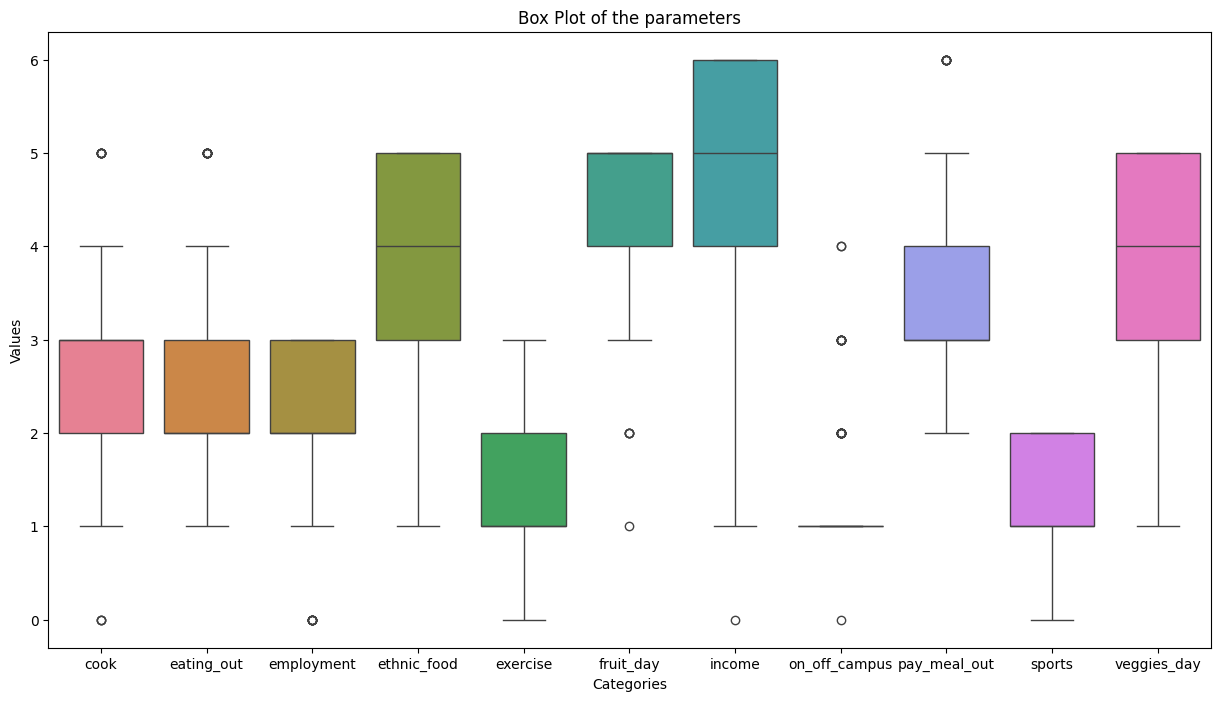

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Box Plot of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

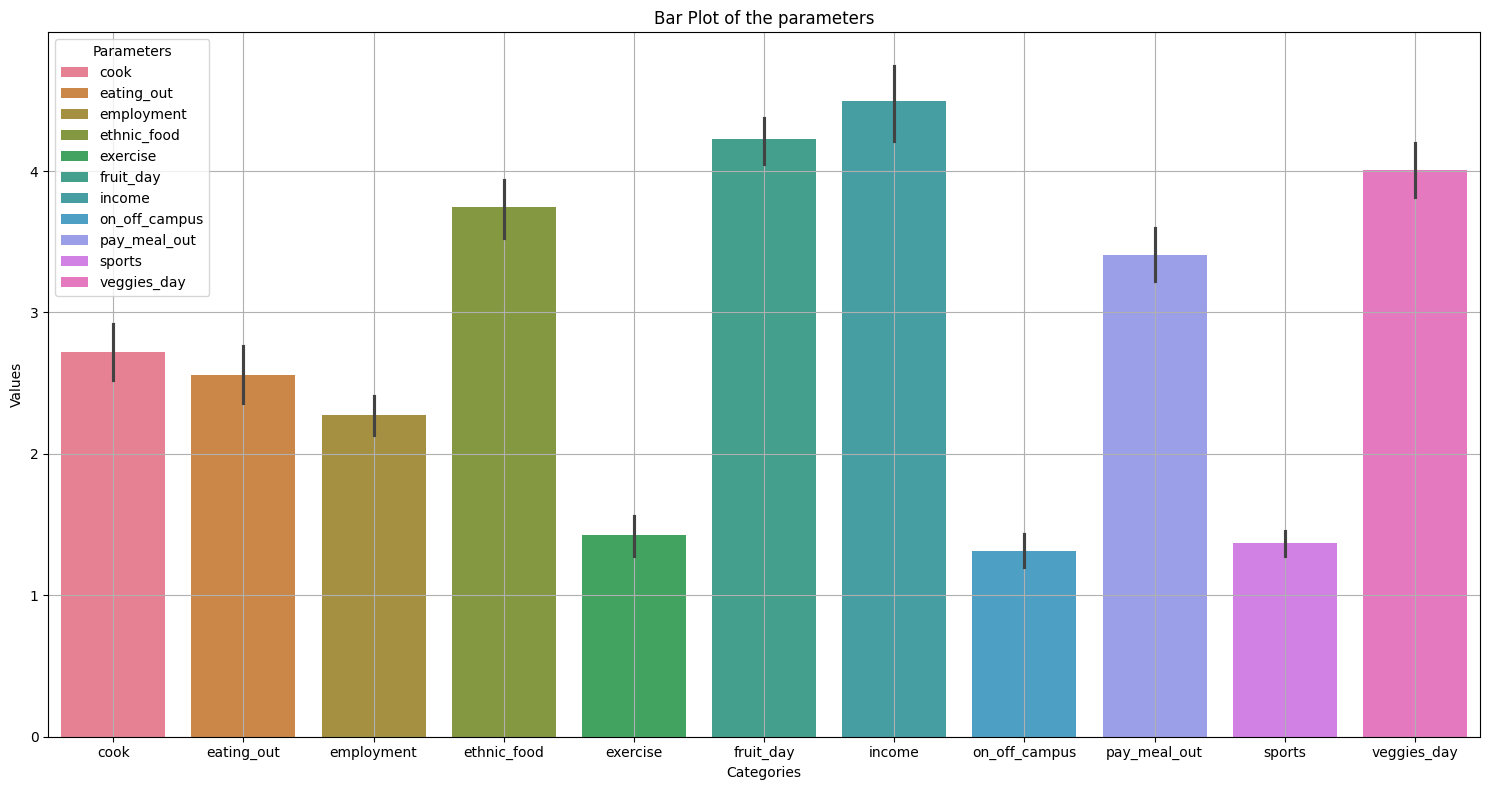

In [12]:
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df, legend=True)
plt.title('Bar Plot of the parameters')
plt.xlabel('Categories')
plt.ylabel('Values')
ax.legend(title='Parameters')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


### Finding the optimal value of K through different methods:

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

### Elbow Method:

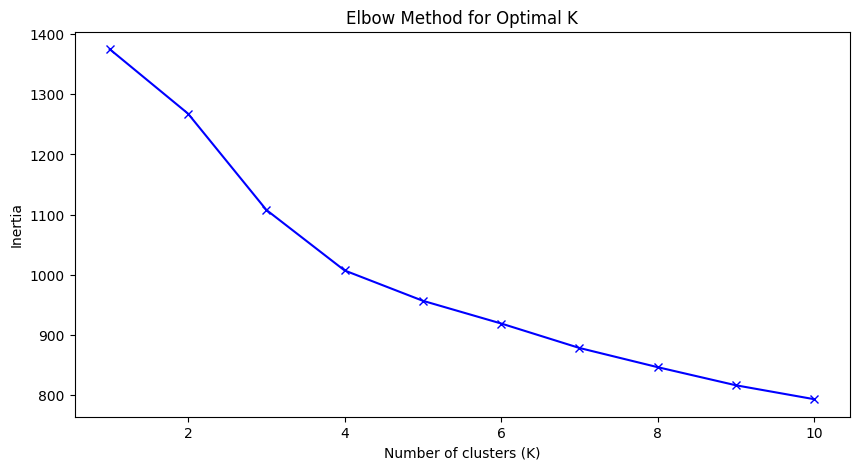

In [15]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [32]:
best_k=range(2,11)[inertia.index(max(inertia))]
print(f"The optimal number of clusters (K) is: {best_k}")

The optimal number of clusters (K) is: 2


### Silhouette Score:

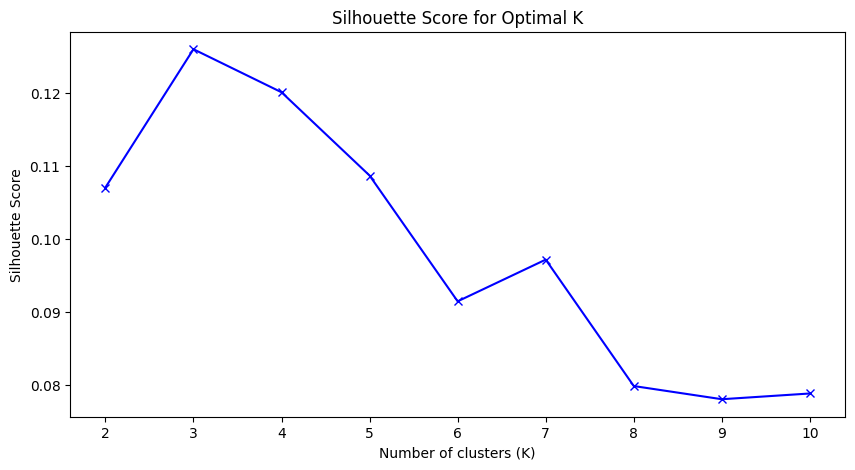

In [17]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [35]:
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters (K) is: {best_k}")

The optimal number of clusters (K) is: 3


In [19]:
optimal_k = best_k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(scaled_data)

df['Cluster'] = final_kmeans.labels_
df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,Cluster
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5,0
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4,0
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5,1
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3,2
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4,0


In [20]:
df.tail()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,Cluster
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5,1
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,0.0,5,0
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4,0
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3,2
124,0.0,1,2.0,3,2.0,3,5.0,1.0,3,2.0,4,2


In [21]:
centroids = final_kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[-3.44891292e-02 -1.28244657e-02  8.93846737e-04  4.12216719e-01
  -3.82015710e-01  5.30747160e-01 -1.18545876e-01 -3.44354760e-01
  -1.74427674e-01 -6.73964252e-02  5.41232435e-01]
 [-3.49270864e-01 -1.41069123e-01 -1.70426778e-01  2.18360098e-01
   2.22052366e-01  4.63926000e-02 -1.97334035e-01  2.26613348e+00
   3.78336081e-01  3.21429105e-01  4.25873057e-01]
 [ 1.70803306e-01  6.73284452e-02  5.67592678e-02 -6.92766021e-01
   4.97323895e-01 -8.11936399e-01  2.45091781e-01 -2.56013365e-01
   1.32663301e-01 -8.48346611e-03 -9.57032649e-01]]


In [22]:
num_rows, num_columns = df.shape
print(f"The dataset has {num_columns} dimensions (features).")

The dataset has 12 dimensions (features).


### Principal Component Analysis (PCA):
##### PCA reduces the number of dimensions by transforming the original features into a smaller set of uncorrelated components that capture most of the variance in the data.

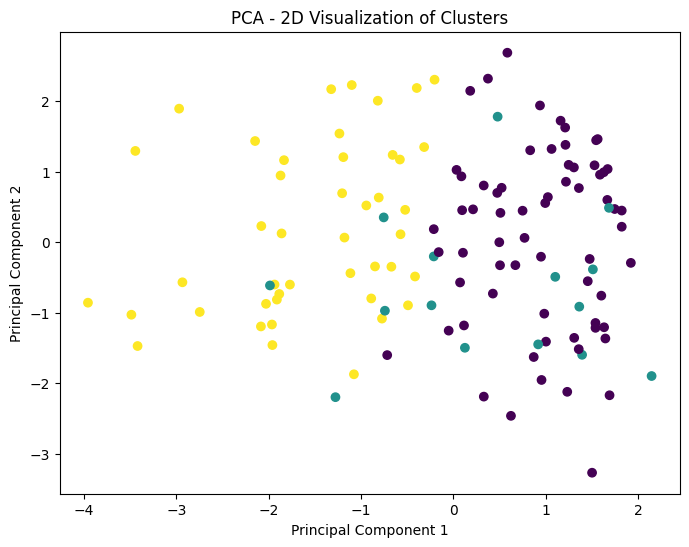

In [23]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization of Clusters')
plt.show()

### Uniform Manifold Approximation and Projection (UMAP):
##### UMAP is another dimensionality reduction technique that can be particularly effective for visualizing clusters in high-dimensional data.

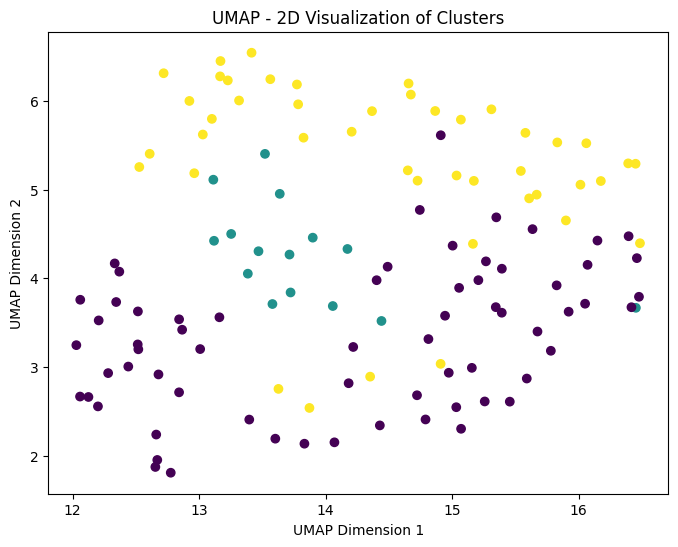

In [24]:
import umap.umap_ as umap

umap_reducer = umap.UMAP(n_components=2, n_jobs=-1)  # n_jobs=-1 uses all available cores
umap_result = umap_reducer.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP - 2D Visualization of Clusters')
plt.show()

###  Geolocational Data from Foursquare API:

#### FoursquareAPI key: fsq3boHgIjG5qvz5vBtpvE8ns4qAo4lrrPFLBf+tlbn+dr8=

In [42]:
api_key = 'fsq3boHgIjG5qvz5vBtpvE8ns4qAo4lrrPFLBf+tlbn+dr8='
url = 'https://api.foursquare.com/v3/places/search'
location = {
    'lat': 12.967408,  # Bengaluru city latitude
    'lng': 77.727948   # Bengaluru city longitude
}
params = {
    'll': f"{location['lat']},{location['lng']}",
    'radius': 2000,  # Radius in meters
    'query': 'college & university',
    'categories': '12000',
    'limit': 10
}
headers = {
    'Accept': 'application/json',
    'Authorization': api_key
}
response = requests.get(url, params=params, headers=headers)

print(f"Status Code: {response.status_code}")
print(f"Response: {response.text}")

if response.status_code == 200:
    results = response.json()

    # Check if the results contain any venues
    if 'results' in results and len(results['results']) > 0:
        # Loop through the results and print the names and addresses
        for place in results['results']:
            name = place.get('name', 'Unknown')
            address = place.get('location', {}).get('formatted_address', 'Address not available')
            print(f"Name: {name}, Address: {address}")
    else:
        print("No results found for this query.")
else:
    print(f"Error: {response.status_code}, {response.text}")

Status Code: 200
Response: {"results":[{"fsq_id":"56b592d1498eb70b8865cb1c","categories":[{"id":12009,"name":"Education","short_name":"Education","plural_name":"Education","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/building/school_","suffix":".png"}}],"chains":[],"closed_bucket":"LikelyOpen","distance":853,"geocodes":{"main":{"latitude":12.974429,"longitude":77.731394},"roof":{"latitude":12.974429,"longitude":77.731394}},"link":"/v3/places/56b592d1498eb70b8865cb1c","location":{"country":"IN","cross_street":"","formatted_address":"941735","postcode":"941735"},"name":"Vydehi School of Excellence","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4c874e4f9683b7133a261e59","categories":[{"id":12013,"name":"College and University","short_name":"College & Education","plural_name":"Colleges and Universities","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/education/default_","suffix":".png"}}],"chains":[],"closed_bucket":"LikelyOpen","distance":994,"geocodes":{"